# Monte Carlo Simulation of an S&P - like Investment

The S&P index has returned a historic annualised average of around 10% since the 1920s. A Monte Carlo simulation produces distributions of possible outcome values. Here I use a Monte Carlo simulation to simulate the returns I could expect if I invested €1,000 every year for 30 years with an additional €1,000 every year.  What is the probability that I will have over €100,000 after 30 years of investing?

## Import Libraries

In [2]:
import numpy as np
from pandas import Series, DataFrame

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import locale

In [5]:
locale.setlocale(locale.LC_ALL, '')

'English_Ireland.1252'

## A traditional savings calculator

In [6]:
pv = 1000
time_horizon = 30
i =.07
additions = 1000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending

€2,070.00
€3,214.90
€4,439.94
€5,750.74
€7,153.29
€8,654.02
€10,259.80
€11,977.99
€13,816.45
€15,783.60
€17,888.45
€20,140.64
€22,550.49
€25,129.02
€27,888.05
€30,840.22
€33,999.03
€37,378.96
€40,995.49
€44,865.18
€49,005.74
€53,436.14
€58,176.67
€63,249.04
€68,676.47
€74,483.82
€80,697.69
€87,346.53
€94,460.79
€102,073.04


We cannot rely on a 7% rate of return every year so some volatility needs to be introduced. I used a volatility of 18% which ranges from +9% to -9%.

In [7]:
pv = 1000
expected_return = 0.09
volatility = .18
time_horizon = 30
annual_addition = 1000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    
    pv = fv

	Return     		Ending Value
	0.5879               	€2,587.88
	-0.1197               	€3,278.19
	0.2714               	€5,167.97
	-0.1297               	€5,497.68
	0.1553               	€7,351.70
	0.1601               	€9,528.39
	0.1475               	€11,933.57
	0.1836               	€15,124.38
	-0.034               	€15,609.48
	0.0259               	€17,013.39
	-0.0855               	€16,559.43
	0.1384               	€19,851.57
	-0.1127               	€18,614.14
	0.0863               	€21,219.90
	-0.1091               	€19,904.36
	0.3197               	€27,268.67
	0.0247               	€28,941.87
	0.3014               	€38,665.40
	-0.0745               	€36,784.03
	-0.0794               	€34,862.99
	0.0508               	€37,632.82
	-0.0303               	€37,491.95
	-0.3091               	€26,904.77
	-0.0325               	€27,031.05
	0.2517               	€34,833.99
	-0.1555               	€30,416.01
	0.0533               	€33,036.08
	0.131               	€38,362.66
	-0.1744         

Looking at the return columns for reach year shows how volatile the markets can be.

What would happen if we ran this 5000 times and characterised a ditribution? We could then make a probablity statement about how much we can expect to see.

## Monte Carlo Simulation

Here I do 5000 iterations of the above calculation:

In [8]:
sim = DataFrame()
iterations = 5000

for x in range(iterations):
    expected_return = 0.09
    volatility = 0.18
    time_horizon = 30
    pv = 1000
    annual_investment = 1000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)
        
        pv = end
        
        
    sim[x] = stream

We just made a massive table with 5000 coulmns, lets just look at the first five:

In [9]:
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,1712.60,2209.29,1843.20,2182.61,2048.18
1,2870.35,3477.92,3105.58,3629.83,3544.12
2,3365.91,4970.32,4449.07,4949.07,5461.71
3,4400.78,6132.88,6892.98,6228.95,5770.61
4,5349.94,6038.03,7088.32,6978.85,8019.18
5,6023.05,6522.07,8716.09,9530.44,6637.27
6,9629.60,8636.17,9368.12,11873.11,8386.66
7,14597.81,14125.19,12179.93,13971.03,10382.47
8,14182.73,16987.44,16066.97,12812.60,12132.29
9,19645.75,19549.07,18637.29,9722.23,15967.15


Plotting this:

Text(0, 0.5, 'Return (€)')

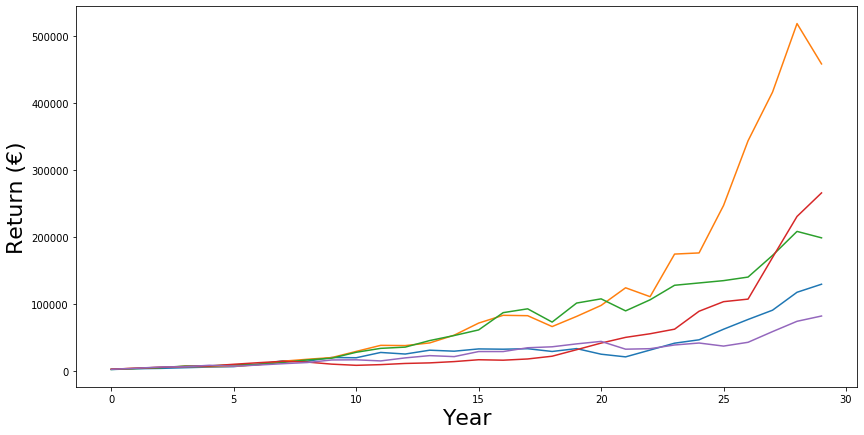

In [10]:
plt.figure(figsize=(14,7))
plt.plot(sim[first_five])
plt.xlabel('Year', fontsize=22)
plt.ylabel('Return (€)', fontsize = 22)

The highest yellow line seems to be around €500,000 but most of the values seem to range from €50,000 to €275,000.

(array([ 59., 208., 371., 445., 459., 405., 406., 337., 324., 278., 228.,
        188., 188., 149., 131., 105.,  93.,  80.,  73.,  49.,  49.,  44.,
         22.,  45.,  26.,  30.,  19.,  15.,  21.,  15.,  20.,  15.,   4.,
          9.,   7.,   5.,   1.,   5.,   3.,   5.,   5.,   4.,   6.,   2.,
          1.,   3.,   5.,   4.,   2.,   3.,   2.,   2.,   1.,   2.,   2.,
          0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   4.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  11045.01  ,   25430.4322,   39815.8544,   54201.2766,
          68586.6988,   82972.121 ,   97357.5432,  111742.9654,
         126128.3876,  140513.8098,  154899.232 ,  169284.6542,
         183670.0764,  198055.4986,  212440.9208,  226826.343 ,
         241211.7652,  255597.1874,  269982.6096,  284368.0318,

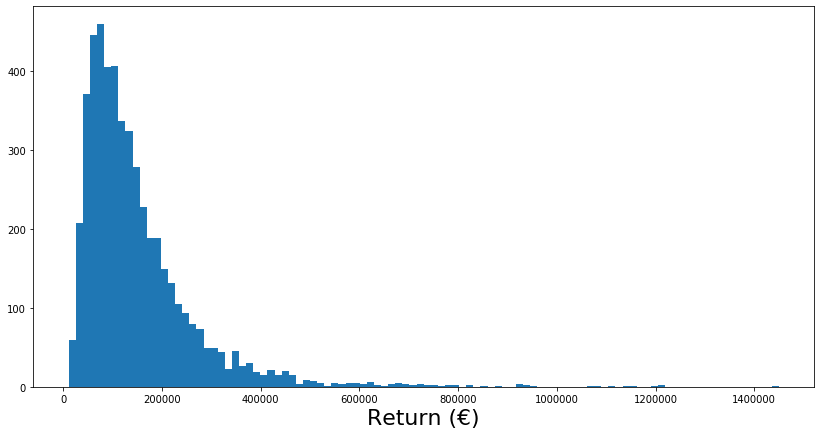

In [11]:
ending_values = sim.loc[29]
plt.figure(figsize=(14,7))
plt.xlabel('Return (€)', fontsize=22)
plt.hist(ending_values, bins=100)

We can see that most of the values are in the range €50,000 to €150,000. This distribution is skewed right so most of the values are to the right of the peak, which seems to be around €125,000. Some of the highest values are up to €1,400,000. After the €400,000 mark there is pretty much no chance of seeing values any larger that that.

## Summary Statistics of our Simulation

In [12]:
print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 5000
Mean:  €149,546.74
SD:  €120,338.23
Max:  €1,449,587.23
Min:  €11,045.01


With 5000 simulations we can see we have a mean of €149,546. 

We have a max of €1,449,587 and a min of €11,045. 

These summary statistics are probably not the best at represeting the simulation. The standard deviation is almost as big as the mean which tells us there is a wide range of ending values.

In [13]:
p_tiles = np.percentile(ending_values,[25,50,75])
for p in range(len(p_tiles)):
    l = [25,50,75]
    print( "{}th percentile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

25th percentile:  €73,816.77
50th percentile:  €117,584.85
75th percentile:  €186,318.28


Comparing the median to the mean, we can see that this data is not distributed normally. The median would present a better idea of what one can expect to make as the values are ranging so much.

## Probability 

What is the probability that we will see less than €100,000?

In [14]:
len(ending_values[ending_values<100000]) / len(ending_values)

0.4064

About 40%. So there is about a 60% chance we will see more than €100,000.